In [1]:
using Plots
using LinearAlgebra
using FastGaussQuadrature
using QuadGK

In [4]:
f(x) = x^2

a = 0.0
b = 1.0
deg = 10

function quad_rule(x, w, a, b)
    @assert b > a
    x_adjusted = (b - a) * 0.5 * (x .+ 1) .+ a
    w_adjusted = (0.5 * (b - a)) .* w
    return x_adjusted, w_adjusted
end

x, w = gausslegendre(deg)
new_x, new_w = quad_rule(x, w, a, b)
S = dot(f.(new_x), new_w)

0.3333333333333334

In [8]:
res = Array{Float64}(undef, 100)
error = Array{Float64}(undef, 100)

for deg in 1:100
    x, w = gausslegendre(deg)
    new_x, new_w = quad_rule(x, w, a, b)
    res[deg] = dot(f.(new_x), new_w)
    error[deg] = abs(res[deg]-(1/3))/(1/3)
end

In [11]:
error

100-element Vector{Float64}:
 0.24999999999999994
 0.0
 1.6653345369377348e-16
 1.6653345369377348e-16
 0.0
 0.0
 6.661338147750939e-16
 8.326672684688674e-16
 1.6653345369377348e-16
 3.3306690738754696e-16
 ⋮
 1.6653345369377348e-16
 1.6653345369377348e-16
 1.6653345369377348e-16
 3.3306690738754696e-16
 1.6653345369377348e-16
 1.6653345369377348e-16
 0.0
 0.0
 0.0

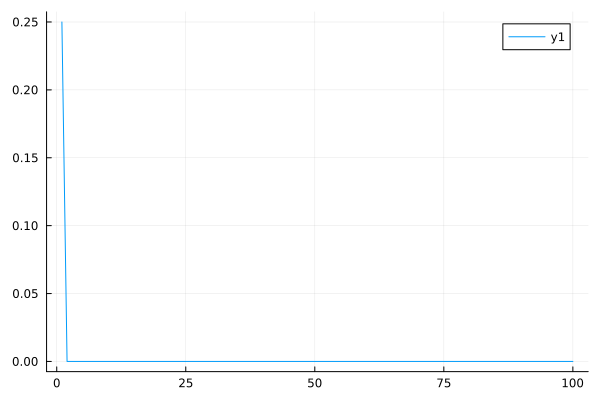

In [12]:
N = collect(1:100)

plot(N, error)